In [1]:
# Reading the cleaned numeric titanic survival data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

TitanicSurvivalDataNumeric=pd.read_pickle('TitanicSurvivalDataNumeric.pkl')
TitanicSurvivalDataNumeric.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [2]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Survived']
Predictors=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
            'Embarked_C', 'Embarked_Q', 'Embarked_S']

X=TitanicSurvivalDataNumeric[Predictors].values
y=TitanicSurvivalDataNumeric[TargetVariable].values


### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 9)
(623, 1)
(268, 9)
(268, 1)


In [3]:
#Build Artificial Neural Network
#Import the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(Dense(units=10, input_dim=9, kernel_initializer='uniform', activation='relu'))

#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=10, verbose=1)

# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=10, verbose=1)

Epoch 1/10
63/63 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.6244
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6340
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7400
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.8042
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.8026
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.7978
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8122
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8058
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.8090
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8058
Epoch 1/10
63/63 [=

In [ ]:
# Defining a function for finding best hyperparameters
def FunctionFindBestParams(X_train, y_train):

    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list=[5, 10, 50 ,100]

    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])

    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1

            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=10, input_dim=9, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


            survivalANN_Model=classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            # Fetching the accuracy of the training
            Accuracy = survivalANN_Model.history['accuracy'][-1]

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)

            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

###############################################

# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.8105939030647278


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 0.8138041496276855


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 0.8443017601966858


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 0.8475120663642883


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 0.812199056148529


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 0.8105939030647278


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 0.841091513633728


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 0.8443017601966858


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 0.6292135119438171


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 0.8089887499809265


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 0.8234350085258484


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 0.8426966071128845


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 0.6934189200401306


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 0.8138041496276855


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 0.8282504081726074


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 0.8459069132804871


<ipython-input-4-b2000192fc3d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


  TrialNumber            Parameters  Accuracy
0           4  batch_size5-epoch100  0.847512


<Axes: xlabel='Parameters'>

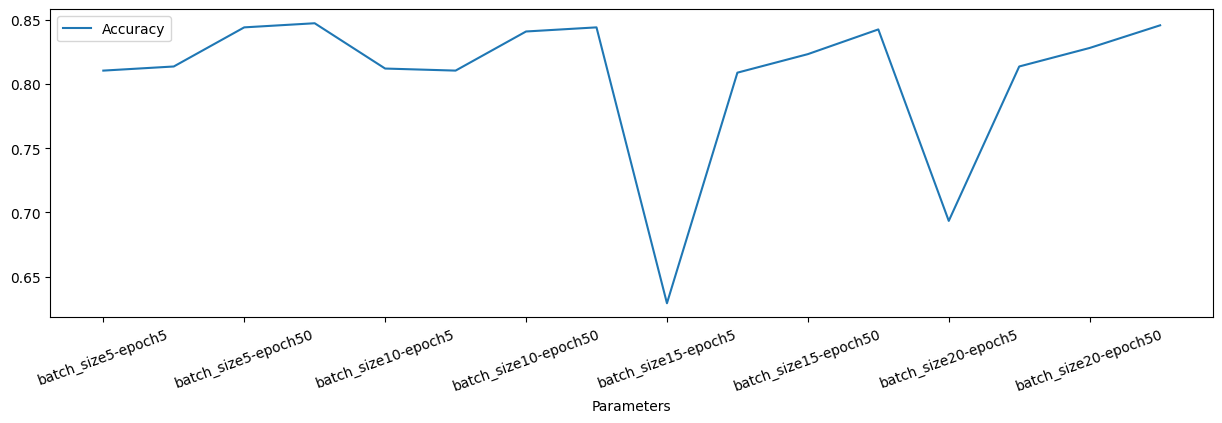

In [ ]:
# Printing the best parameter
print(ResultsData.sort_values(by='Accuracy', ascending=False).head(1))

# Visualizing the results
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)

In [ ]:
# Training the model with best hyperparamters
classifier.fit(X_train,y_train, batch_size=5 , epochs=100, verbose=1)

Epoch 1/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8186
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8202
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8218
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8202
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.8154
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4254 - accuracy: 0.8202
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8186
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.8186
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.8154
Epoch 10/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4218 - accura

In [ ]:
# Predictions on testing data
Predictions=classifier.predict(X_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Survival']=y_test
TestingData['PredictedSurvivalProb']=Predictions

# Defining the probability threshold
def probThreshold(inpProb):
    if inpProb  >  0.5:
        return(1)
    else:
        return(0)

# Generating predictions on the testing data by applying probability threshold
TestingData['PredictedSurvival']=TestingData['PredictedSurvivalProb'].apply(probThreshold)
print(TestingData.head())

###############################################
from sklearn import metrics
print('\n######### Testing Accuracy Results #########')
print(metrics.classification_report(TestingData['Survival'], TestingData['PredictedSurvival']))
print(metrics.confusion_matrix(TestingData['Survival'], TestingData['PredictedSurvival']))

9/9 [==============================] - 0s 2ms/step
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0     3.0  1.0  23.0    1.0    1.0  15.2458         1.0         0.0   
1     2.0  1.0  31.0    0.0    0.0  10.5000         0.0         0.0   
2     3.0  1.0  20.0    0.0    0.0   7.9250         0.0         0.0   
3     2.0  0.0   6.0    0.0    1.0  33.0000         0.0         0.0   
4     3.0  0.0  14.0    1.0    0.0  11.2417         1.0         0.0   

   Embarked_S  Survival  PredictedSurvivalProb  PredictedSurvival  
0         0.0         1               0.316418                  0  
1         1.0         0               0.125686                  0  
2         1.0         0               0.136789                  0  
3         1.0         1               0.882143                  1  
4         0.0         1               0.546725                  1  

######### Testing Accuracy Results #########
              precision    recall  f1-score   support

           0 

In [ ]:
# Function to generate Deep ANN model
def make_classification_ann(Optimizer_Trial, Neurons_Trial):
    from keras.models import Sequential
    from keras.layers import Dense

    # Creating the classifier ANN model
    classifier = Sequential()
    classifier.add(Dense(units=Neurons_Trial, input_dim=9, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=Neurons_Trial, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=Optimizer_Trial, loss='binary_crossentropy', metrics=['accuracy'])

    return classifier

########################################

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_Trial':['adam', 'rmsprop'],
                  'Neurons_Trial': [5,10]
                 }

# Creating the classifier ANN
classifierModel=KerasClassifier(make_classification_ann, verbose=0)

########################################

# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=classifierModel, param_grid=Parameter_Trials, scoring='f1', cv=5)

########################################

# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X_train,y_train, verbose=1)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

########################################

# printing the best parameters
print('\n#### Best hyperparamters ####')
grid_search.best_params_

Epoch 1/10


C:\Users\admin\AppData\Local\Temp\ipykernel_6032\1686040440.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifierModel=KerasClassifier(make_classification_ann, verbose=0)


50/50 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.6064
Epoch 2/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.6265
Epoch 3/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6611 - accuracy: 0.6265
Epoch 4/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6188 - accuracy: 0.6285
Epoch 5/10
50/50 [==============================] - 0s 1ms/step - loss: 0.5708 - accuracy: 0.6948
Epoch 6/10
50/50 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.7731
Epoch 7/10
50/50 [==============================] - 0s 1ms/step - loss: 0.5126 - accuracy: 0.8032
Epoch 8/10
50/50 [==============================] - 0s 1ms/step - loss: 0.4937 - accuracy: 0.8193
Epoch 9/10
50/50 [==============================] - 0s 998us/step - loss: 0.4786 - accuracy: 0.8213
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10
50/50 [==============================] - 1s 1ms/step 

50/50 [==============================] - 0s 1ms/step - loss: 0.4915 - accuracy: 0.7992
Epoch 12/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4867 - accuracy: 0.7952
Epoch 13/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7972
Epoch 14/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.7972
Epoch 15/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.7992
Epoch 16/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.7952
Epoch 17/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.7952
Epoch 18/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7952
Epoch 19/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.7972
Epoch 20/20
4/4 [==============================] - 0s 2ms/step
Epoch 1/20
50/50 [==============================] - 1s 1ms

25/25 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.6365
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.6365
Epoch 3/10
25/25 [==============================] - 0s 958us/step - loss: 0.6824 - accuracy: 0.6365
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.6365
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6563 - accuracy: 0.6365
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6358 - accuracy: 0.6365
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.6365
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5936 - accuracy: 0.6365
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5779 - accuracy: 0.6365
Epoch 10/10
4/4 [==============================] - 0s 0s/step
Epoch 1/10
25/25 [==============================] - 1s 1ms/step -

25/25 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.6185
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.6265
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.6265
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.6265
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.6265
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.6305
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.7028
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5868 - accuracy: 0.7570
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5608 - accuracy: 0.7651
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.7671
Epoch 11/20
25/25 [===========

17/17 [==============================] - 1s 1ms/step - loss: 0.6923 - accuracy: 0.6185
Epoch 2/10
17/17 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.6265
Epoch 3/10
17/17 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.6265
Epoch 4/10
17/17 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.6265
Epoch 5/10
17/17 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.6265
Epoch 6/10
17/17 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.6265
Epoch 7/10
17/17 [==============================] - 0s 1ms/step - loss: 0.6584 - accuracy: 0.6265
Epoch 8/10
17/17 [==============================] - 0s 1ms/step - loss: 0.6434 - accuracy: 0.6265
Epoch 9/10
17/17 [==============================] - 0s 1ms/step - loss: 0.6269 - accuracy: 0.6265
Epoch 10/10
4/4 [==============================] - 0s 1ms/step
Epoch 1/10
17/17 [==============================] - 1s 974us/step 

17/17 [==============================] - 0s 1ms/step - loss: 0.5884 - accuracy: 0.7932
Epoch 12/20
17/17 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.8072
Epoch 13/20
17/17 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.8012
Epoch 14/20
17/17 [==============================] - 0s 1ms/step - loss: 0.5319 - accuracy: 0.8052
Epoch 15/20
17/17 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.8072
Epoch 16/20
17/17 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.8112
Epoch 17/20
17/17 [==============================] - 0s 1ms/step - loss: 0.4915 - accuracy: 0.8133
Epoch 18/20
17/17 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.8032
Epoch 19/20
17/17 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.8052
Epoch 20/20
4/4 [==============================] - 0s 1ms/step
Epoch 1/20
17/17 [==============================] - 1s 2ms

50/50 [==============================] - 1s 1ms/step - loss: 0.6909 - accuracy: 0.6212
Epoch 2/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.6373
Epoch 3/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.6373
Epoch 4/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.6373
Epoch 5/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.6413
Epoch 6/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.6533
Epoch 7/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.7054
Epoch 8/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6182 - accuracy: 0.7475
Epoch 9/10
50/50 [==============================] - 0s 1ms/step - loss: 0.5986 - accuracy: 0.7715
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10
50/50 [==============================] - 1s 1ms/step - 

50/50 [==============================] - 1s 1ms/step - loss: 0.6899 - accuracy: 0.6333
Epoch 2/20
50/50 [==============================] - 0s 1ms/step - loss: 0.6807 - accuracy: 0.6373
Epoch 3/20
50/50 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.6373
Epoch 4/20
50/50 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.6373
Epoch 5/20
50/50 [==============================] - 0s 1ms/step - loss: 0.6149 - accuracy: 0.6373
Epoch 6/20
50/50 [==============================] - 0s 1ms/step - loss: 0.5899 - accuracy: 0.6373
Epoch 7/20
50/50 [==============================] - 0s 1ms/step - loss: 0.5701 - accuracy: 0.6573
Epoch 8/20
50/50 [==============================] - 0s 1ms/step - loss: 0.5529 - accuracy: 0.7174
Epoch 9/20
50/50 [==============================] - 0s 1ms/step - loss: 0.5380 - accuracy: 0.7735
Epoch 10/20
50/50 [==============================] - 0s 1ms/step - loss: 0.5253 - accuracy: 0.8036
Epoch 11/20
50/50 [===========

25/25 [==============================] - 1s 1ms/step - loss: 0.6915 - accuracy: 0.6032
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.6192
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.6192
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.6192
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.6212
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.6453
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.6934
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.7335
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.7695
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/20
25/25 [==============================] - 1s 1ms/step - 

25/25 [==============================] - 0s 1ms/step - loss: 0.6130 - accuracy: 0.6373
Epoch 13/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6017 - accuracy: 0.6373
Epoch 14/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5903 - accuracy: 0.6533
Epoch 15/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5791 - accuracy: 0.6954
Epoch 16/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5683 - accuracy: 0.7234
Epoch 17/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5579 - accuracy: 0.7515
Epoch 18/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5478 - accuracy: 0.7535
Epoch 19/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.7675
Epoch 20/20
4/4 [==============================] - 0s 0s/step
Epoch 1/20
25/25 [==============================] - 1s 1ms/step - loss: 0.6914 - accuracy: 0.6172
Epoch 2/20
25/25 [==============================] - 0s 1ms/s

17/17 [==============================] - 0s 975us/step - loss: 0.6917 - accuracy: 0.6145
Epoch 2/20
17/17 [==============================] - 0s 976us/step - loss: 0.6893 - accuracy: 0.6265
Epoch 3/20
17/17 [==============================] - 0s 976us/step - loss: 0.6870 - accuracy: 0.6265
Epoch 4/20
17/17 [==============================] - 0s 976us/step - loss: 0.6845 - accuracy: 0.6265
Epoch 5/20
17/17 [==============================] - 0s 977us/step - loss: 0.6814 - accuracy: 0.6265
Epoch 6/20
17/17 [==============================] - 0s 976us/step - loss: 0.6777 - accuracy: 0.6265
Epoch 7/20
17/17 [==============================] - 0s 976us/step - loss: 0.6734 - accuracy: 0.6265
Epoch 8/20
17/17 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6265
Epoch 9/20
17/17 [==============================] - 0s 976us/step - loss: 0.6623 - accuracy: 0.6265
Epoch 10/20
17/17 [==============================] - 0s 976us/step - loss: 0.6558 - accuracy: 0.6265
Epoch 11/20


Epoch 1/20
17/17 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.6212
Epoch 2/20
17/17 [==============================] - 0s 976us/step - loss: 0.6896 - accuracy: 0.6192
Epoch 3/20
17/17 [==============================] - 0s 976us/step - loss: 0.6878 - accuracy: 0.6192
Epoch 4/20
17/17 [==============================] - 0s 976us/step - loss: 0.6858 - accuracy: 0.6192
Epoch 5/20
17/17 [==============================] - 0s 976us/step - loss: 0.6831 - accuracy: 0.6192
Epoch 6/20
17/17 [==============================] - 0s 977us/step - loss: 0.6800 - accuracy: 0.6212
Epoch 7/20
17/17 [==============================] - 0s 977us/step - loss: 0.6763 - accuracy: 0.6253
Epoch 8/20
17/17 [==============================] - 0s 976us/step - loss: 0.6718 - accuracy: 0.6393
Epoch 9/20
17/17 [==============================] - 0s 976us/step - loss: 0.6665 - accuracy: 0.6673
Epoch 10/20
17/17 [==============================] - 0s 976us/step - loss: 0.6604 - accuracy: 0.6994
E

50/50 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8112
Epoch 11/20
50/50 [==============================] - 0s 957us/step - loss: 0.4156 - accuracy: 0.8193
Epoch 12/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8173
Epoch 13/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8153
Epoch 14/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8213
Epoch 15/20
50/50 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8253
Epoch 16/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8253
Epoch 17/20
50/50 [==============================] - 0s 1ms/step - loss: 0.3990 - accuracy: 0.8213
Epoch 18/20
50/50 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8233
Epoch 19/20
50/50 [==============================] - 0s 1ms/step - loss: 0.3961 - accuracy: 0.8213
Epoch 20/20
4/4 [===

50/50 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.7976
Epoch 11/20
50/50 [==============================] - 0s 956us/step - loss: 0.4517 - accuracy: 0.7976
Epoch 12/20
50/50 [==============================] - 0s 956us/step - loss: 0.4479 - accuracy: 0.8056
Epoch 13/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4464 - accuracy: 0.8036
Epoch 14/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.8056
Epoch 15/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8096
Epoch 16/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.8036
Epoch 17/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8056
Epoch 18/20
50/50 [==============================] - 0s 956us/step - loss: 0.4373 - accuracy: 0.8056
Epoch 19/20
50/50 [==============================] - 0s 956us/step - loss: 0.4357 - accuracy: 0.8096
Epoch 20/20
4/

4/4 [==============================] - 0s 0s/step
Epoch 1/20
25/25 [==============================] - 1s 1ms/step - loss: 0.6908 - accuracy: 0.6365
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.6365
Epoch 3/20
25/25 [==============================] - 0s 651us/step - loss: 0.6660 - accuracy: 0.6365
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6295 - accuracy: 0.6365
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5861 - accuracy: 0.6365
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5568 - accuracy: 0.6386
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5424 - accuracy: 0.7129
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5340 - accuracy: 0.7771
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5263 - accuracy: 0.7871
Epoch 10/20
25/25 [==============================] - 0s 1ms/step -

4/4 [==============================] - 0s 0s/step
Epoch 1/10
17/17 [==============================] - 1s 976us/step - loss: 0.6921 - accuracy: 0.6124
Epoch 2/10
17/17 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.6265
Epoch 3/10
17/17 [==============================] - 0s 976us/step - loss: 0.6872 - accuracy: 0.6265
Epoch 4/10
17/17 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.6265
Epoch 5/10
17/17 [==============================] - 0s 976us/step - loss: 0.6758 - accuracy: 0.6386
Epoch 6/10
17/17 [==============================] - 0s 976us/step - loss: 0.6626 - accuracy: 0.7008
Epoch 7/10
17/17 [==============================] - 0s 976us/step - loss: 0.6420 - accuracy: 0.7410
Epoch 8/10
17/17 [==============================] - 0s 976us/step - loss: 0.6132 - accuracy: 0.7651
Epoch 9/10
17/17 [==============================] - 0s 976us/step - loss: 0.5764 - accuracy: 0.7851
Epoch 10/10
4/4 [==============================] - 0s 

17/17 [==============================] - 0s 976us/step - loss: 0.5823 - accuracy: 0.7309
Epoch 9/20
17/17 [==============================] - 0s 976us/step - loss: 0.5565 - accuracy: 0.7490
Epoch 10/20
17/17 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7631
Epoch 11/20
17/17 [==============================] - 0s 976us/step - loss: 0.5180 - accuracy: 0.7892
Epoch 12/20
17/17 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.7992
Epoch 13/20
17/17 [==============================] - 0s 976us/step - loss: 0.4957 - accuracy: 0.7972
Epoch 14/20
17/17 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7972
Epoch 15/20
17/17 [==============================] - 0s 976us/step - loss: 0.4839 - accuracy: 0.7992
Epoch 16/20
17/17 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7992
Epoch 17/20
17/17 [==============================] - 0s 976us/step - loss: 0.4763 - accuracy: 0.7992
Epoch 18/20

50/50 [==============================] - 0s 956us/step - loss: 0.4793 - accuracy: 0.8153
Epoch 9/10
50/50 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.8112
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10
50/50 [==============================] - 1s 1ms/step - loss: 0.6882 - accuracy: 0.6386
Epoch 2/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6714 - accuracy: 0.6365
Epoch 3/10
50/50 [==============================] - 0s 924us/step - loss: 0.6392 - accuracy: 0.6365
Epoch 4/10
50/50 [==============================] - 0s 1ms/step - loss: 0.6009 - accuracy: 0.6365
Epoch 5/10
50/50 [==============================] - 0s 957us/step - loss: 0.5693 - accuracy: 0.6767
Epoch 6/10
50/50 [==============================] - 0s 1ms/step - loss: 0.5506 - accuracy: 0.7289
Epoch 7/10
50/50 [==============================] - 0s 1ms/step - loss: 0.5365 - accuracy: 0.7771
Epoch 8/10
50/50 [==============================] - 0s 1ms/s

50/50 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.8012
Epoch 19/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4655 - accuracy: 0.7932
Epoch 20/20
4/4 [==============================] - 0s 2ms/step
Epoch 1/20
50/50 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.6225
Epoch 2/20
50/50 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.6265
Epoch 3/20
50/50 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.6486
Epoch 4/20
50/50 [==============================] - 0s 1ms/step - loss: 0.6202 - accuracy: 0.7369
Epoch 5/20
50/50 [==============================] - 0s 1ms/step - loss: 0.5730 - accuracy: 0.7851
Epoch 6/20
50/50 [==============================] - 0s 1ms/step - loss: 0.5267 - accuracy: 0.8032
Epoch 7/20
50/50 [==============================] - 0s 1ms/step - loss: 0.4919 - accuracy: 0.8032
Epoch 8/20
50/50 [==============================] - 0s 1ms/step -

25/25 [==============================] - 0s 1ms/step - loss: 0.5710 - accuracy: 0.7349
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5522 - accuracy: 0.7610
Epoch 10/10
4/4 [==============================] - 0s 1ms/step
Epoch 1/10
25/25 [==============================] - 1s 1ms/step - loss: 0.6908 - accuracy: 0.6265
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.6265
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6711 - accuracy: 0.6265
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6529 - accuracy: 0.6265
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6289 - accuracy: 0.6285
Epoch 6/10
25/25 [==============================] - 0s 989us/step - loss: 0.6018 - accuracy: 0.6386
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.6867
Epoch 8/10
25/25 [==============================] - 0s 1ms/step 

25/25 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.6285
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5508 - accuracy: 0.7269
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5357 - accuracy: 0.7610
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5231 - accuracy: 0.7671
Epoch 11/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5120 - accuracy: 0.7831
Epoch 12/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7871
Epoch 13/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4942 - accuracy: 0.7972
Epoch 14/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.7992
Epoch 15/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.8012
Epoch 16/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.8092
Epoch 17/20
25/25 [=====

17/17 [==============================] - 0s 1ms/step - loss: 0.6650 - accuracy: 0.7851
Epoch 8/10
17/17 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.7871
Epoch 9/10
17/17 [==============================] - 0s 1ms/step - loss: 0.6482 - accuracy: 0.7952
Epoch 10/10
4/4 [==============================] - 0s 5ms/step
Epoch 1/10
17/17 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.6293
Epoch 2/10
17/17 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.6373
Epoch 3/10
17/17 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.6373
Epoch 4/10
17/17 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.6393
Epoch 5/10
17/17 [==============================] - 0s 1ms/step - loss: 0.6619 - accuracy: 0.6453
Epoch 6/10
17/17 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.6854
Epoch 7/10
17/17 [==============================] - 0s 1ms/step - 

17/17 [==============================] - 0s 1ms/step - loss: 0.5065 - accuracy: 0.8072
Epoch 18/20
17/17 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.8052
Epoch 19/20
17/17 [==============================] - 0s 1ms/step - loss: 0.4928 - accuracy: 0.8193
Epoch 20/20
4/4 [==============================] - 0s 1ms/step
Epoch 1/20
17/17 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.6333
Epoch 2/20
17/17 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.6373
Epoch 3/20
17/17 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.6373
Epoch 4/20
17/17 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.6373
Epoch 5/20
17/17 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.6373
Epoch 6/20
17/17 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.6373
Epoch 7/20
17/17 [==============================] - 0s 1ms/step 

{'Neurons_Trial': 10,
 'Optimizer_Trial': 'adam',
 'batch_size': 30,
 'epochs': 20}